<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/L15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P15.1.1

In [257]:
import numpy as np


def odesolve(f,tspan,y0,N,params):
  from scipy.integrate import ode
  r = ode(f)
  r.set_integrator('vode',rtol=1e-6) # pick method, relative accuracy
  h = float(tspan[1]-tspan[0])/N # time step
  t = [0]*(N+1); y = [0]*(N+1) # initialize output
  n = 0
  r.set_initial_value(y=y0,t=tspan[0]) # initial condition
  r.set_f_params(params) # parameters, duh...
  t[0] = r.t; y[0] = r.y;
  while r.successful() and n < N:
    r.integrate(r.t+h) # integrate ODE r from t to t+h
    n += 1; t[n] = r.t; y[n] = r.y; # record new values
  return t,y


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


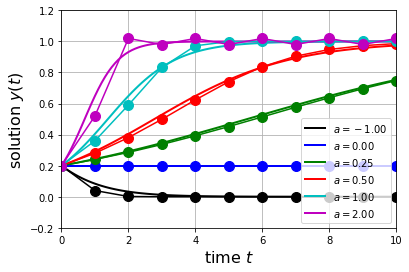

In [258]:
f = lambda t,y,a: a*y*(1.-y) # ODE rhs
from matplotlib.pyplot import close, figure, plot, axis, grid, xlabel, ylabel, legend, savefig, show # for plotting
close() # if figure was open
figure(1)
tspan = [0,10]
y0 = 0.2 # IC
a = (-1.,0.,.25,.5,1.,2.) # list of parameter values
colors = 'kbgrcm' # one color for each parameter value
N = 100 # first "exact" solution plotted using sufficiently many points
for k in range(0,6): # k=0...5
  t,y = odesolve(f,tspan,y0,N,a[k]) # uses VODE
  plot(t,y,label=r'$a = %.2f$' % a[k],linewidth=2,color=colors[k])
N = 10 # Euler with step size (tspan[1]-tspan[0])/N = 1
for k in range(0,6):
  t,y = myeuler(f,tspan,y0,N,a[k])
  plot(t,y,'.-',markersize=20,color=colors[k])
axis(tspan+[-.2,1.2]) # [0.,10.,-.2,1.2]
grid('on')
xlabel(r'time $t$',fontsize=16)
ylabel(r'solution $y(t)$',fontsize=16)
legend(loc='lower right')
savefig('myode.eps') # exports as encapsulated postscript file0246810

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


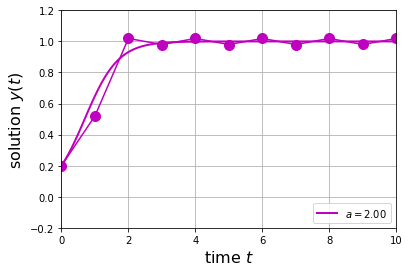

In [259]:
f = lambda t,y,a: a*y*(1.-y) # ODE rhs
from matplotlib.pyplot import close, figure, plot, axis, grid, xlabel, ylabel, legend, savefig, show # for plotting
close() # if figure was open
figure(1)
tspan = [0,10]
y0 = 0.2 # IC
a = (-1.,0.,.25,.5,1.,2.) # list of parameter values
colors = 'kbgrcm' # one color for each parameter value
N = 100 # first "exact" solution plotted using sufficiently many points
for k in range(5,6): # k=0...5
  t,y = odesolve(f,tspan,y0,N,a[k]) # uses VODE
  plot(t,y,label=r'$a = %.2f$' % a[k],linewidth=2,color=colors[k])
N = 10 # Euler with step size (tspan[1]-tspan[0])/N = 1
for k in range(5,6):
  t,y = myeuler(f,tspan,y0,N,a[k])
  plot(t,y,'.-',markersize=20,color=colors[k])
axis(tspan+[-.2,1.2]) # [0.,10.,-.2,1.2]
grid('on')
xlabel(r'time $t$',fontsize=16)
ylabel(r'solution $y(t)$',fontsize=16)
legend(loc='lower right')
savefig('myode.eps') # exports as encapsulated postscript file0246810

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


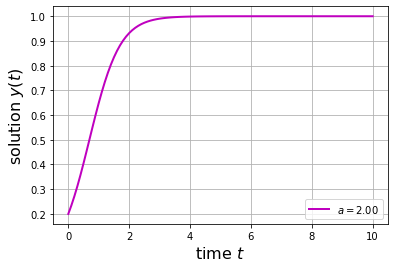

In [260]:
f = lambda t,y,a: a*y*(1.-y) # ODE rhs
from matplotlib.pyplot import close, figure, plot, axis, grid, xlabel, ylabel, legend, savefig, show # for plotting
close() # if figure was open
figure(1)
tspan = [0,10]
y0 = 0.2 # IC
a = (-1.,0.,.25,.5,1.,2.) # list of parameter values
colors = 'kbgrcm' # one color for each parameter value
N = 100 # first "exact" solution plotted using sufficiently many points
for k in range(5,6): # k=0...5
  t,y = odesolve(f,tspan,y0,N,a[k]) # uses VODE
  plot(t,y,label=r'$a = %.2f$' % a[k],linewidth=2,color=colors[k])
grid()
xlabel(r'time $t$',fontsize=16)
ylabel(r'solution $y(t)$',fontsize=16)
legend(loc='lower right')
savefig('myode.eps') # exports as encapsulated postscript file0246810

In [261]:
import math
def exact(t, y0):
  return y0 / (y0 - (y0 - 1)*math.e**(-2*t))


def myexact(tspan,y0,N):
  h = float(tspan[1]-tspan[0])/N # time step
  t = tspan[0]; y = y0
  tout = [0]*(N+1); yout = [0]*(N+1) # reserve space for output
  tout[0] = t; yout[0] = y # set initial t and y
  for n in range(1,N+1): # n=1..N
    f1 = exact(t,y) # y' @ current t
    t += h # update t
    tout[n] = t; yout[n] = f1
  return tout,yout


#myexact(tspan, y0, N)

[[0.00000000e+00 0.00000000e+00 3.39223413e-02 ... 7.99999985e-01
  7.99999988e-01 7.99999990e-01]
 [3.39222374e-02 3.39222374e-02 1.03888017e-07 ... 7.66077748e-01
  7.66077750e-01 7.66077752e-01]
 [7.16440660e-02 7.16440660e-02 3.77217247e-02 ... 7.28355919e-01
  7.28355922e-01 7.28355924e-01]
 ...
 [7.99999620e-01 7.99999620e-01 7.66077278e-01 ... 3.65393786e-07
  3.68116934e-07 3.70346458e-07]
 [7.99999115e-01 7.99999115e-01 7.66076774e-01 ... 8.69900190e-07
  8.72623337e-07 8.74852862e-07]
 [7.99998943e-01 7.99998943e-01 7.66076602e-01 ... 1.04162280e-06
  1.04434595e-06 1.04657547e-06]]


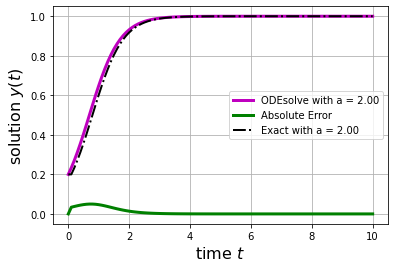

In [262]:
import numpy as np

f = lambda t,y,a: a*y*(1.-y) # ODE rhs
from matplotlib.pyplot import close, figure, plot, axis, grid, xlabel, ylabel, legend, savefig, show # for plotting
close() # if figure was open
figure(1)
tspan = [0,10]
y0 = 0.2 # IC
a = (-1.,0.,.25,.5,1.,2.) # list of parameter values
colors = 'kygrcm' # one color for each parameter value
N = 100 # first "exact" solution plotted using sufficiently many points
te,ye = myexact(tspan, y0, N)
yearr = np.array(ye)
t2,y2 = odesolve(f,tspan,y0,N,a[5])
caty = np.concatenate(np.array(y2))
yerr = abs(caty - yearr)
tnp = np.array(t2)
ynp = np.array(y2)
somet = abs(tnp - te)
somey = abs(ynp - ye)
print(somey)
#plot(somet,somey,label='Absolute Error',linewidth=3,color=colors[2])
for k in range(5,6): # k=0...5
  t,y = odesolve(f,tspan,y0,N,a[k]) # uses VODE
  plot(t,y,label='ODEsolve with a = %.2f' % a[k],linewidth=3,color=colors[k])
  #somet = abs(t - te)
  #somey = abs(y - ye)
  plot(t,yerr,label='Absolute Error',linewidth=3,color=colors[2])
plot(te,ye,'-.',markersize=10,linewidth=2,color=colors[0],label='Exact with a = 2.00')
grid()
xlabel(r'time $t$',fontsize=16)
ylabel(r'solution $y(t)$',fontsize=16)
legend(loc='right')
savefig('myodestuff.png', bbox_inches='tight', dpi=300)

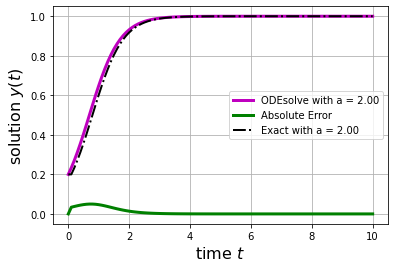

In [263]:
import numpy as np

f = lambda t,y,a: a*y*(1.-y) # ODE rhs
from matplotlib.pyplot import close, figure, plot, axis, grid, xlabel, ylabel, legend, savefig, show # for plotting
close() # if figure was open
figure(1)
tspan = [0,10]
y0 = 0.2 # IC
a = (-1.,0.,.25,.5,1.,2.) # list of parameter values
colors = 'kygrcm' # one color for each parameter value
N = 100 # first "exact" solution plotted using sufficiently many points
te,ye = myexact(tspan, y0, N)
yearr = np.array(ye)
t2,y2 = odesolve(f,tspan,y0,N,a[5])
caty = np.concatenate(np.array(y2))
yerr = abs(caty - yearr)
for k in range(5,6): # k=0...5
  t,y = odesolve(f,tspan,y0,N,a[k]) # uses VODE
  plot(t,y,label='ODEsolve with a = %.2f' % a[k],linewidth=3,color=colors[k])
  plot(t,yerr,label='Absolute Error',linewidth=3,color=colors[2])
plot(te,ye,'-.',markersize=10,linewidth=2,color=colors[0],label='Exact with a = 2.00')
grid()
xlabel(r'time $t$',fontsize=16)
ylabel(r'solution $y(t)$',fontsize=16)
legend(loc='right')
savefig('myodestuff.png', bbox_inches='tight', dpi=900)

P15.1.2

In [264]:
import numpy as np

In [265]:
def myimpeuler(f,tspan,y0,N,params):
  h = float(tspan[1]-tspan[0])/N
  t = tspan[0]; y = y0
  tout = np.zeros((N+1,1)); yout = np.zeros((N+1,np.size(y0)))
  tout[0] = t; yout[0] = y
  for n in range(1,N+1):
    k1 = f(t,y,params)
    k2 = f(t+h,y+h*k1,params)
    t += h
    y += h*(k1+k2)/2.0
    tout[n] = t; yout[n] = y
  return tout,yout


In [266]:
def myeuler(f,tspan,y0,N,params):
  h = float(tspan[1]-tspan[0])/N # time step
  t = tspan[0]; y = y0
  tout = [0]*(N+1); yout = [0]*(N+1) # reserve space for output
  tout[0] = t; yout[0] = y # set initial t and y
  for n in range(1,N+1): # n=1..N
    f1 = f(t,y,params) # y' @ current t
    t += h # update t
    y += h*f1 # update y
    tout[n] = t; yout[n] = y
  return tout,yout

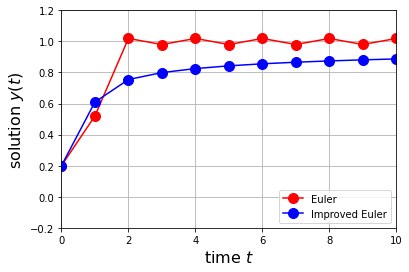

In [267]:
def rhs(t,y,params):
  return params['a']*y*(1.-y)

tspan = [0, 10]
N = 10
params = {'a':2}
y0 = 0.2
t,y = myimpeuler(rhs,tspan,y0,N,params)

from matplotlib.pyplot import close, figure, plot, axis, grid, xlabel, ylabel, legend, savefig, show
figure(1)
t,y = myeuler(rhs,tspan,y0,N,params)
timp,yimp = myimpeuler(rhs,tspan,y0,N,params)
plot(t,y,'.-',markersize=20,color='r',label = 'Euler')
plot(timp, yimp,'.-',markersize=20,color='b', label = 'Improved Euler')
axis(tspan+[-.2,1.2])
grid()
xlabel(r'time $t$',fontsize=16)
ylabel(r'solution $y(t)$',fontsize=16)
legend(loc='lower right')
savefig('myode_a2.png', bbox_inches='tight', dpi=900)

P15.2.1

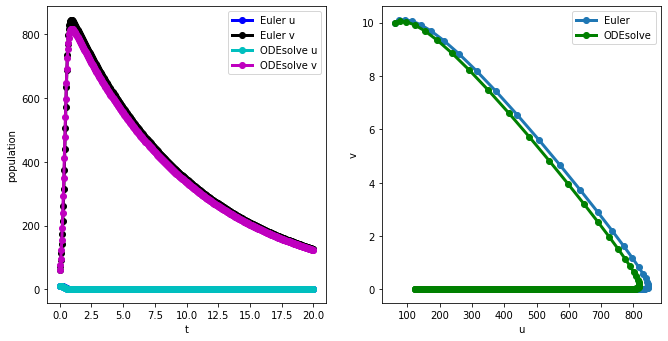

In [268]:
import numpy as np


def odesolve(f,tspan,y0,N,params):
  from scipy.integrate import ode
  r = ode(f)
  r.set_integrator('vode',rtol=1e-6) # pick method, relative accuracy
  h = float(tspan[1]-tspan[0])/N # time step
  t = [0]*(N+1); y = [0]*(N+1) # initialize output
  n = 0
  r.set_initial_value(y=y0,t=tspan[0]) # initial condition
  r.set_f_params(params) # parameters, duh...
  t[0] = r.t; y[0] = r.y;
  while r.successful() and n < N:
    r.integrate(r.t+h) # integrate ODE r from t to t+h
    n += 1; t[n] = r.t; y[n] = r.y; # record new values
  return t,y



def myeuler(f,tspan,u0,N,params):
  h = np.diff(tspan)/N
  t = np.linspace(*tspan,N+1)
  u = np.zeros((len(t),*np.array(u0).shape))
  u[0] = np.array(u0)
  for k in range(N):
    k1 = h*f(t,u[k],params)
    u[k+1] = u[k] + k1
  return t,u


def rhs(t,y,params):
  a,b,c,d = [params[k] for k in 'a b c d'.split()]
  u,v = y
  dudt = a*u - b*u*v
  dvdt = c*u*v - d*v
  return np.r_[dudt, dvdt]


if __name__ == '__main__':
  import pylab as plt
  tspan = np.r_[0, 20]
  N = 500
  U0 = np.r_[10, 60]
  params = dict(a=0.8,b=1e-2,c=0.6,d=0.1)


  t,U = myeuler(rhs,tspan,U0,N,params)
  u,v = U.T


  t1,U1 = odesolve(rhs,tspan,U0,N,params)
  someU1 = np.array(U1)
  u1,v1 = someU1.T

  


  plt.figure(figsize=(11,12))
  plt.subplot(2,2,1)
  plt.plot(t,u,'bo-',lw=3,label='Euler u')
  plt.plot(t,v,'ko-',lw=3,label='Euler v')
  plt.plot(t1,u1,'co-',lw=3,label='ODEsolve u')
  plt.plot(t1,v1,'mo-',lw=3,label='ODEsolve v')
  plt.legend()
  plt.xlabel('t')
  plt.ylabel('population')
  plt.subplot(2,2,2)
  plt.plot(v,u,'o-',lw=3,label='Euler')
  plt.plot(v1,u1,'go-',lw=3,label='ODEsolve')
  plt.legend()
  plt.xlabel('u')
  plt.ylabel('v')
  plt.savefig('out.png',bbox_inches='tight', dpi=300)


In [269]:
"""

import numpy as np


def odesolve(f,tspan,y0,N,params):
  from scipy.integrate import ode
  r = ode(f)
  r.set_integrator('vode',rtol=1e-6) # pick method, relative accuracy
  h = float(tspan[1]-tspan[0])/N # time step
  t = [0]*(N+1); y = [0]*(N+1) # initialize output
  n = 0
  r.set_initial_value(y=y0,t=tspan[0]) # initial condition
  r.set_f_params(params) # parameters, duh...
  t[0] = r.t; y[0] = r.y;
  while r.successful() and n < N:
    r.integrate(r.t+h) # integrate ODE r from t to t+h
    n += 1; t[n] = r.t; y[n] = r.y; # record new values
  return t,y




def f(t,y,params):
  s,i = y # retrieve s and i from 2x1 vector y
  mu,beta,gamma = params # retrieve parameters from params list
  dsdt = mu*(1.0-s)-beta*s*i
  didt = beta*s*i-(mu+gamma)*i
  return np.array([dsdt,didt])
tspan = [0.,100.] # initial and final times
y0 = s0,i0 = [.1,.1] # initial values
params = mu,beta,gamma = [.05,.8,.3] # parameters
N = 100 # "exact" solution plotted using sufficiently many points
t,y = odesolve(f,tspan,y0,N,params)
t = t[:,0]; s = y[:,0]; i = y[:,1]; # extract variables
N = 50 # Euler solution with step size (tspan[1]-tspan[0])/N=2
t1,y1 = myeuler(f,tspan,y0,N,params)
t1 = t1[:,0]; s1 = y1[:,0]; i1 = y1[:,1]; # extract variables
from matplotlib.pyplot import * # plots
close() # if figure already open
figure(1) # open figure
subplot(2,1,1) # partitions figure as 2x1 and select first (top)
plot(t,s,'b-',t1,s1,'bo',t,i,'r-',t1,i1,'ro',linewidth=2,markersize=5)
legend([r'$s(t)$','Euler',r'$i(t)$','Euler'])
axis(tspan+[0.,1.]) # [0.,100.,0.,1.]
grid('on')
subplot(2,1,2) # partitions figure as 2x1 and select second (bottom)
plot(s,i,'k-',s1,i1,'ro',linewidth=2,markersize=5) # phase plot i vs s
legend(['exact','Euler'],loc='best')
xlabel(r'$s$')
ylabel(r'$i$')
axis([0.,.7,0.,.2])
grid('on')
savefig('s_and_i.eps') # export figure as eps
show()


"""

'\n\nimport numpy as np\n\n\ndef odesolve(f,tspan,y0,N,params):\n  from scipy.integrate import ode\n  r = ode(f)\n  r.set_integrator(\'vode\',rtol=1e-6) # pick method, relative accuracy\n  h = float(tspan[1]-tspan[0])/N # time step\n  t = [0]*(N+1); y = [0]*(N+1) # initialize output\n  n = 0\n  r.set_initial_value(y=y0,t=tspan[0]) # initial condition\n  r.set_f_params(params) # parameters, duh...\n  t[0] = r.t; y[0] = r.y;\n  while r.successful() and n < N:\n    r.integrate(r.t+h) # integrate ODE r from t to t+h\n    n += 1; t[n] = r.t; y[n] = r.y; # record new values\n  return t,y\n\n\n\n\ndef f(t,y,params):\n  s,i = y # retrieve s and i from 2x1 vector y\n  mu,beta,gamma = params # retrieve parameters from params list\n  dsdt = mu*(1.0-s)-beta*s*i\n  didt = beta*s*i-(mu+gamma)*i\n  return np.array([dsdt,didt])\ntspan = [0.,100.] # initial and final times\ny0 = s0,i0 = [.1,.1] # initial values\nparams = mu,beta,gamma = [.05,.8,.3] # parameters\nN = 100 # "exact" solution plotted using

P16.2.1